In [2]:
#This notebook contains an analysis of the Titanic dataset from Kaggle.
#The dataset includes a list of features describing each passenger (e.g age, sex) and a target describing whether they survived.

In [3]:
#Loading the training set

import pandas as pd

train = pd.read_csv('train.csv')

In [4]:
#Examining the first few rows

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Plotting survival based on gender

import matplotlib
from matplotlib import pyplot as plt

survived_sex = train[train['Survived']==1]['Sex'].value_counts()
died_sex = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, died_sex])
df.index = ['Survived', 'Died']
df.plot(kind='bar', stacked=True, figsize=(15,5))
plt.show()

<Figure size 1500x500 with 1 Axes>

In [6]:
#Females are more likely to survive than males. This makes sense because women were given priority access to lifeboats

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#The Name feature contains a title e.g. Mr. that might be useful
#Extracting the title and creating a new feature

train['Title'] = train.Name
train.Title = train.Title.map(lambda t: t.split(',')[1].strip().split('.')[0].strip().replace('.',''))
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [9]:
#Reducing the number of unique titles

title_mapping = {
    "Mr":"mr",
    "Master" : "master",
    "Mrs" :"mrs", "Mme":"mrs", "Ms": "mrs",
    "Miss" :"miss", "Mlle": "miss",
    "Capt":"other", "Col":"other", "Major":"other", "Jonkheer":"other", "Don":"other", "Sir" :"other",
    "Dr":"other", "Rev":"other", "the Countess":"other", "Dona":"other", "Lady" :"other"
	}
train.Title = train.Title.map(title_mapping)
train.Title.unique()

array(['mr', 'mrs', 'miss', 'master', 'other'], dtype=object)

In [10]:
#Describing the Age feature

print("number of training instances: ",len(train))
train.Age.describe()

number of training instances:  891


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
#There are missing values for the Age feature
#How to fill missing values?  Could use the median age.  Might be better to group the data based on the Title and the Pclass
#and use the median age of the appropriate group

grouped_by_sex_class = train.groupby(['Sex','Pclass'])

def fill_median(series):
    return series.fillna(series.median())

train.Age = grouped_by_sex_class.Age.transform(fill_median)
train.Age.describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

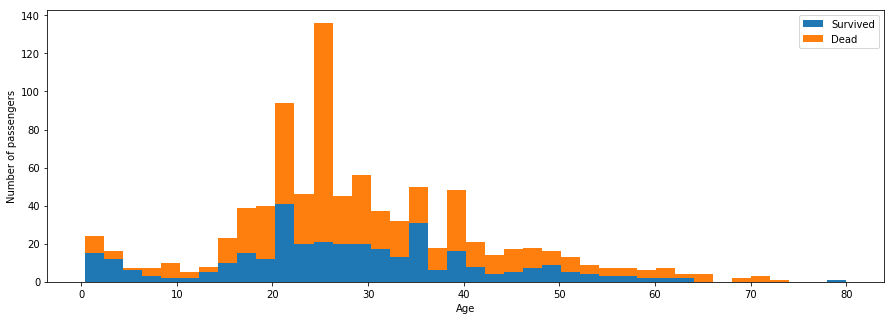

In [12]:
#Plotting survival based on age

plt.figure(figsize=(15,5))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], stacked=True,
         bins = 40,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

In [13]:
#The histogram shows children had a higher chance of survival. This makes sense because woman and children were given
#priority access to lifeboats.
#What other features require processing?

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


In [14]:
#Converting the sex to a boolean

train.Sex = train.Sex.map({'male':'1', 'female':'0'})

In [15]:
#Filling in the missing values for embarked with the most frequest value

train.Embarked.fillna('S', inplace=True)

In [16]:
#Fill in missing values for Fare with the mean

train.Fare.fillna(train.Fare.mean(), inplace=True)

In [17]:
#Removing the digits from the ticket column, and filling in tickets with 'XXX' if they have no prefix

train.Ticket = train.Ticket.map(lambda t: t.split()[0].replace('.','').replace('/',''))

def replace_digits(ticket):
    if ticket.isdigit():
        return 'XXX'
    else:
        return ticket
    
train.Ticket = train.Ticket.map(replace_digits)

In [18]:
#Only need the letter prefix from the Cabin feature
#Remove the digits and fill missing values with 'U' for unknown

train.Cabin.fillna('U', inplace=True)
train.Cabin = train.Cabin.map(lambda c: c[0])

In [19]:
#Dropping the features that aren't needed

train.drop('PassengerId', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,1,22.0,1,0,A5,7.2500,U,S,mr
1,1,1,0,38.0,1,0,PC,71.2833,C,C,mrs
2,1,3,0,26.0,0,0,STONO2,7.9250,U,S,miss
3,1,1,0,35.0,1,0,XXX,53.1000,C,S,mrs
4,0,3,1,35.0,0,0,XXX,8.0500,U,S,mr


In [20]:
#Need to dummy encode some features

dummies = pd.get_dummies(train['Pclass'], prefix='Pclass')
train = pd.concat([train,dummies], axis=1)
train.drop('Pclass', axis=1, inplace=True)

dummies = pd.get_dummies(train['Ticket'], prefix='Ticket')
train = pd.concat([train,dummies], axis=1)
train.drop('Ticket', axis=1, inplace=True)

dummies = pd.get_dummies(train['Cabin'], prefix='Cabin')
train = pd.concat([train,dummies], axis=1)
train.drop('Cabin', axis=1, inplace=True)

dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train,dummies], axis=1)
train.drop('Embarked', axis=1, inplace=True)

dummies = pd.get_dummies(train['Title'], prefix='Title')
train = pd.concat([train,dummies], axis=1)
train.drop('Title', axis=1, inplace=True)

train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Ticket_A4,...,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_master,Title_miss,Title_mr,Title_mrs,Title_other
0,0,1,22.0,1,0,7.2500,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,1,0,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [21]:
#The data is ready to use to build a statistical model
#Extracting the targets (Survival) from the data

targets = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [22]:
#Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 'min_samples_split': 10,
              'max_features': 'sqrt', 'max_depth': 6}
clf = RandomForestClassifier(**parameters)

def compute_score(clf, X, y, repititions, scoring='accuracy'):
	scores = cross_val_score(clf, X, y, cv = repititions, scoring=scoring)
	return scores

scores = compute_score(clf, train, targets, 20, 'accuracy')
print(scores.mean())

#The classifier averages around 83% accuracy

0.8327602108036892
